In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'C:\Users\rojy2\Desktop\NTI\FinalProject\zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
# Normalize column names: lowercase, remove spaces
df.columns = df.columns.str.strip().str.lower()


In [7]:
df = df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
df.drop_duplicates(inplace = True)
df.shape

(51609, 11)

In [10]:
## Get the unique values in rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\1687008678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(), inplace = True)


0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [14]:
df.dropna(inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [15]:
df.rename(columns = {'approx_cost(for two people)':'cost2plates', 'listed_in(type)':'type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [17]:
df['listed_in(city)'].unique()


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [18]:
df = df.drop(['listed_in(city)'], axis = 1)

In [19]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return int(value)
    else:
        return int(value)
    
df['cost2plates'] = df['cost2plates'].apply(handlecomma)
df['cost2plates'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [21]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [22]:
rest_types = df['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [23]:
rest_types=df['rest_type'].value_counts(ascending=False)

In [24]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [25]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()
        

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [26]:
location = df['location'].value_counts(ascending  = False)

location_lessthan300 = location[location<300]



def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [27]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'L

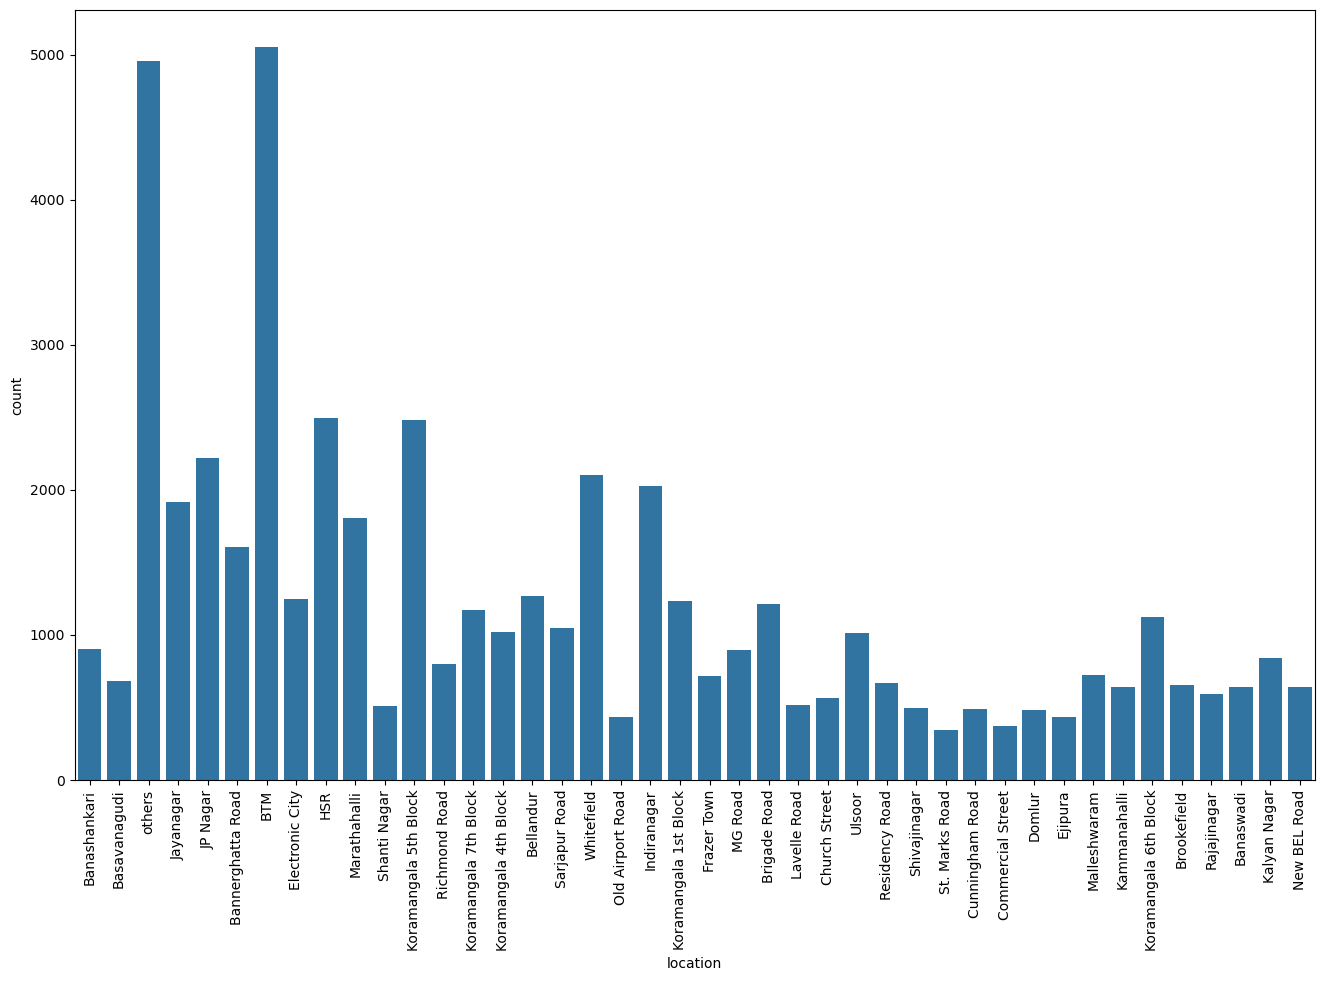

In [28]:
## Count plot of various locations


plt.figure(figsize=(16,10))
ax = sns.countplot(x='location', data=df)
plt.xticks(rotation=90)


# online ordering

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\3154387120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='inferno')


<Axes: xlabel='online_order', ylabel='count'>

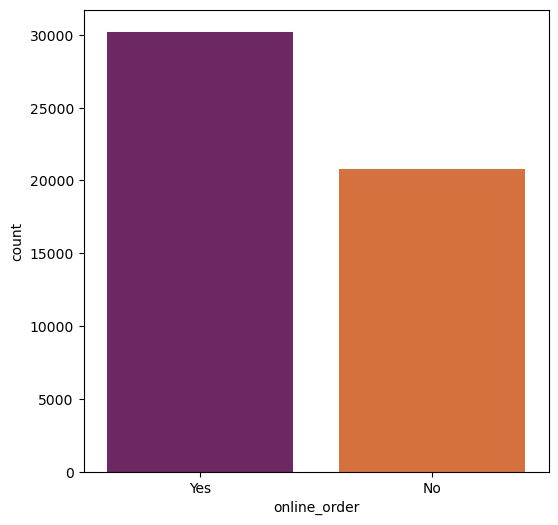

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='online_order', data=df, palette='inferno')


# online booking

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\4061789617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table', data=df, palette='rainbow')


<Axes: xlabel='book_table', ylabel='count'>

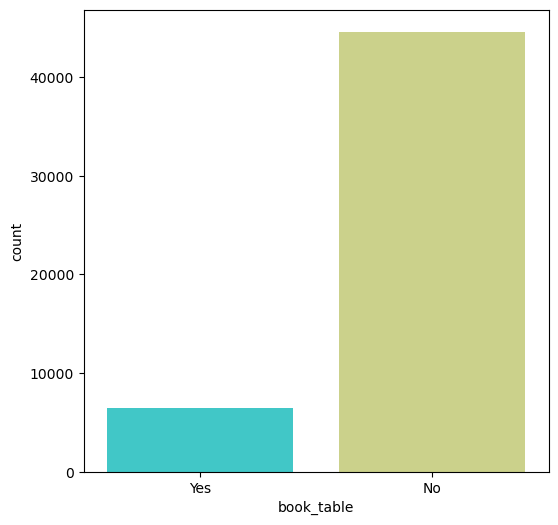

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x='book_table', data=df, palette='rainbow')


# online order vs rate

<Axes: xlabel='online_order', ylabel='rate'>

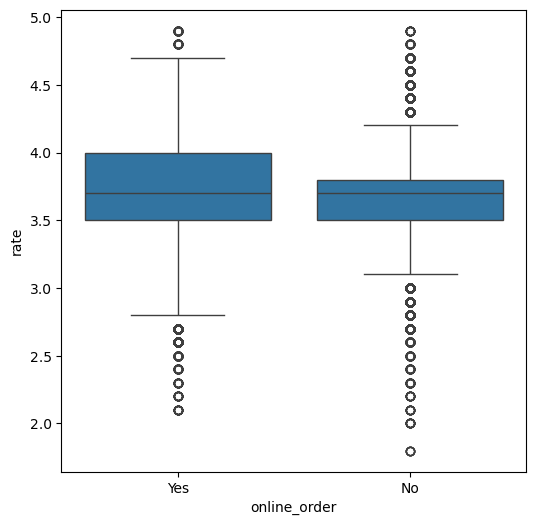

In [31]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

# Book table vs rate

<Axes: xlabel='book_table', ylabel='rate'>

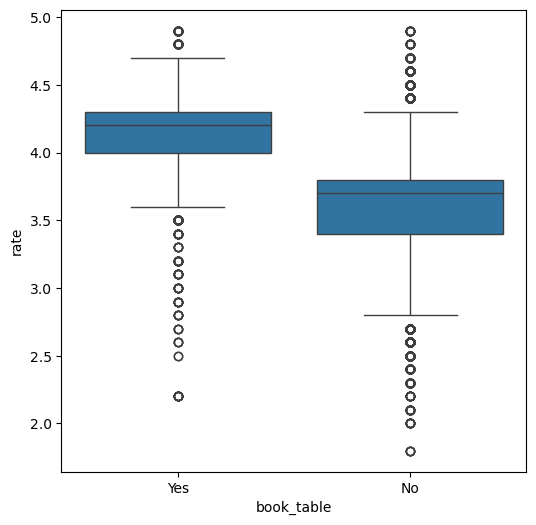

In [32]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

# Online order facility and location wise

In [33]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\2546502282.py:4: FutureWarning: The provided callable <function sum at 0x000001606C200900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

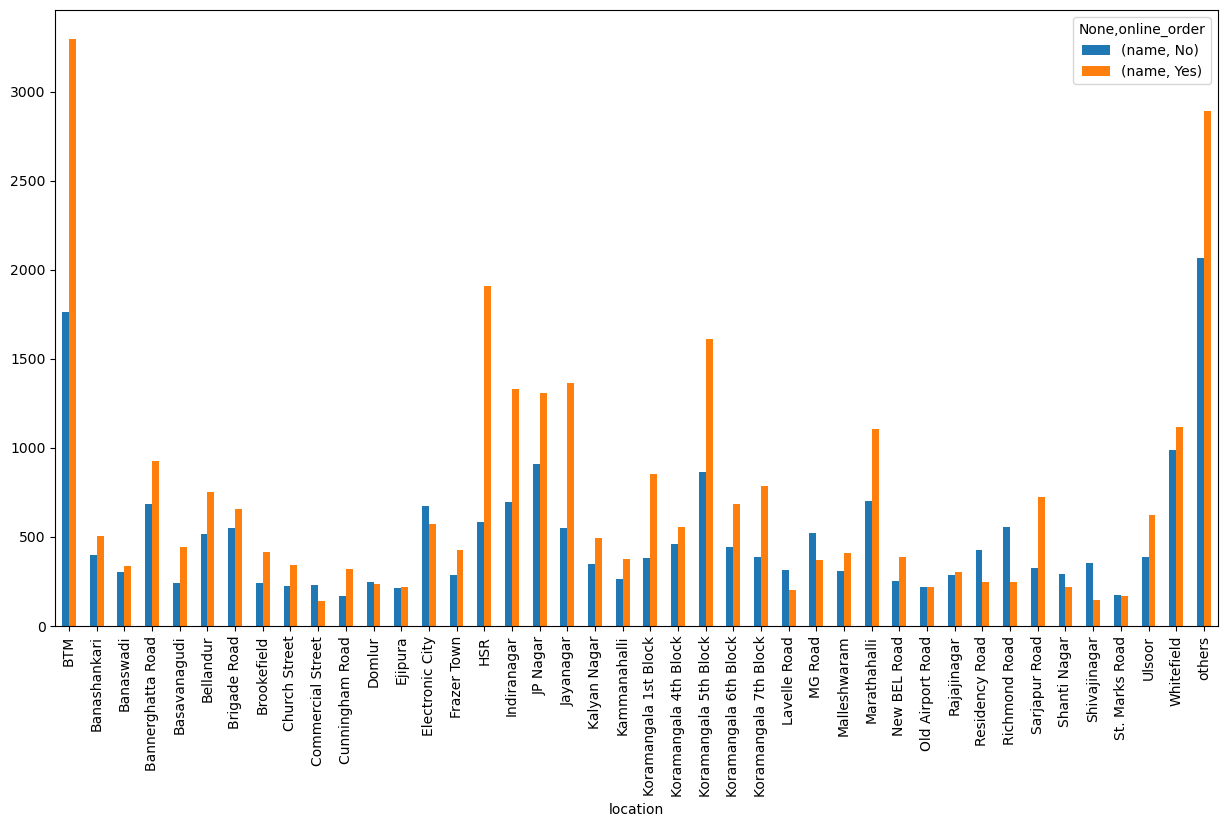

In [34]:
df1.plot(kind = 'bar', figsize = (15,8))

# Book table facility and location wise

In [35]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\814380054.py:4: FutureWarning: The provided callable <function sum at 0x000001606C200900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)


name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

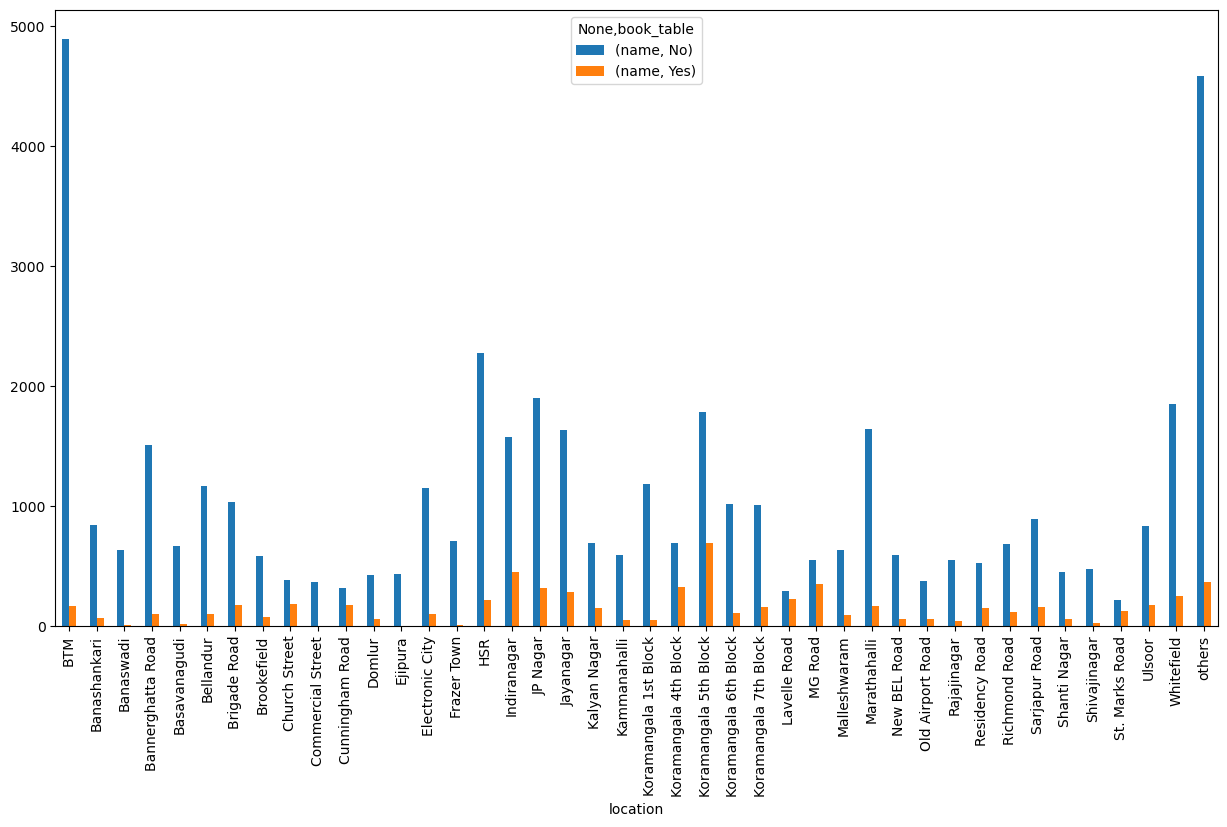

In [36]:
df2.plot(kind = 'bar', figsize = (15,8))


# types of restaurants 

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\2549958406.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')


<Axes: xlabel='type', ylabel='rate'>

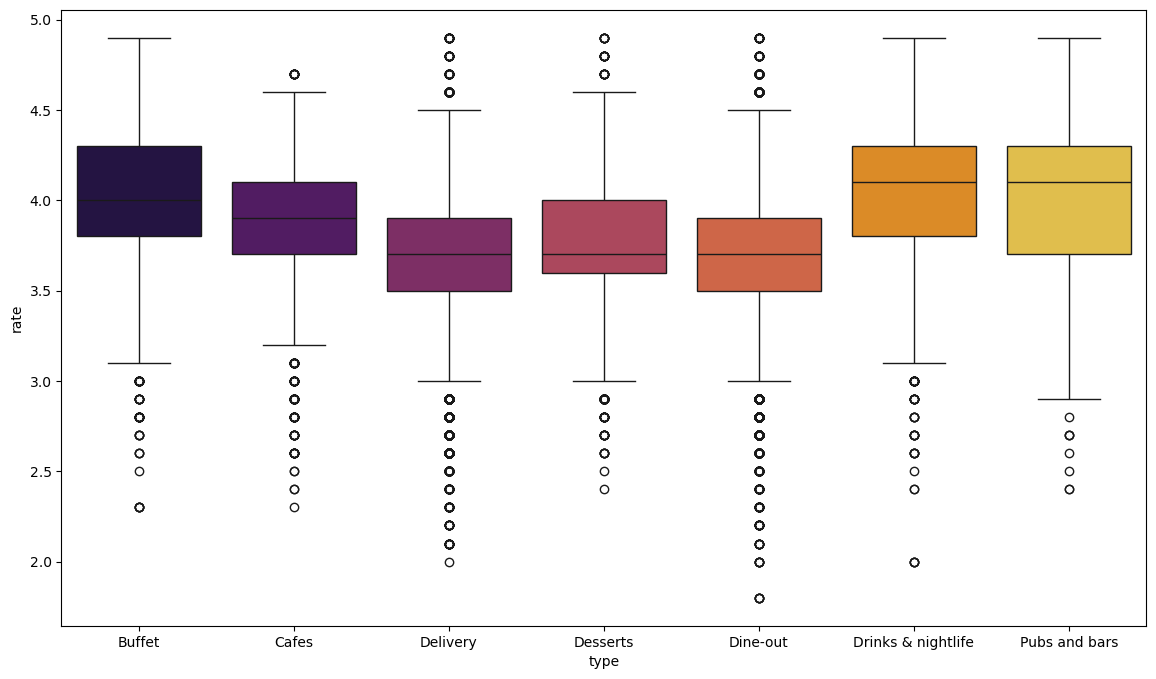

In [37]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')

# location and what types of restaurants it has

In [38]:
df3 = df.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3


C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\958444515.py:4: FutureWarning: The provided callable <function sum at 0x000001606C200900> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)


name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

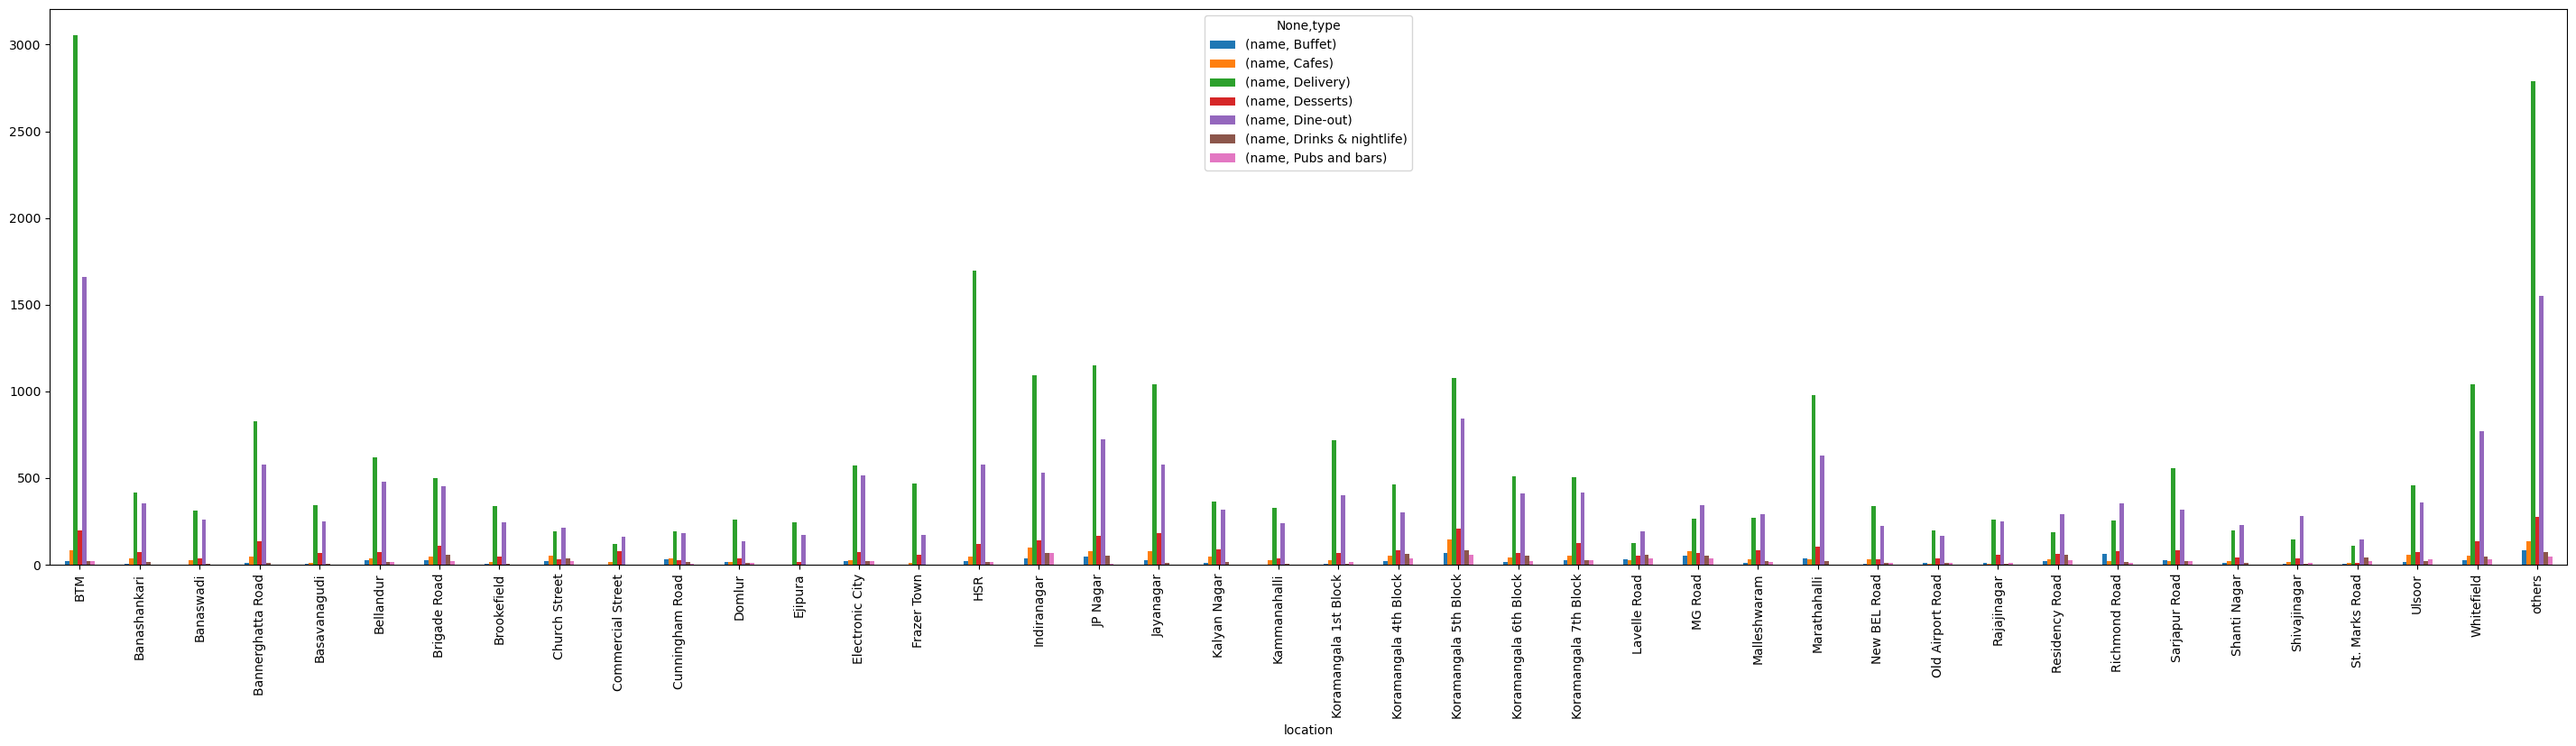

In [39]:
df3.plot(kind = 'bar', figsize = (36,8))

# Feedback and voting for restaurants 

In [40]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text

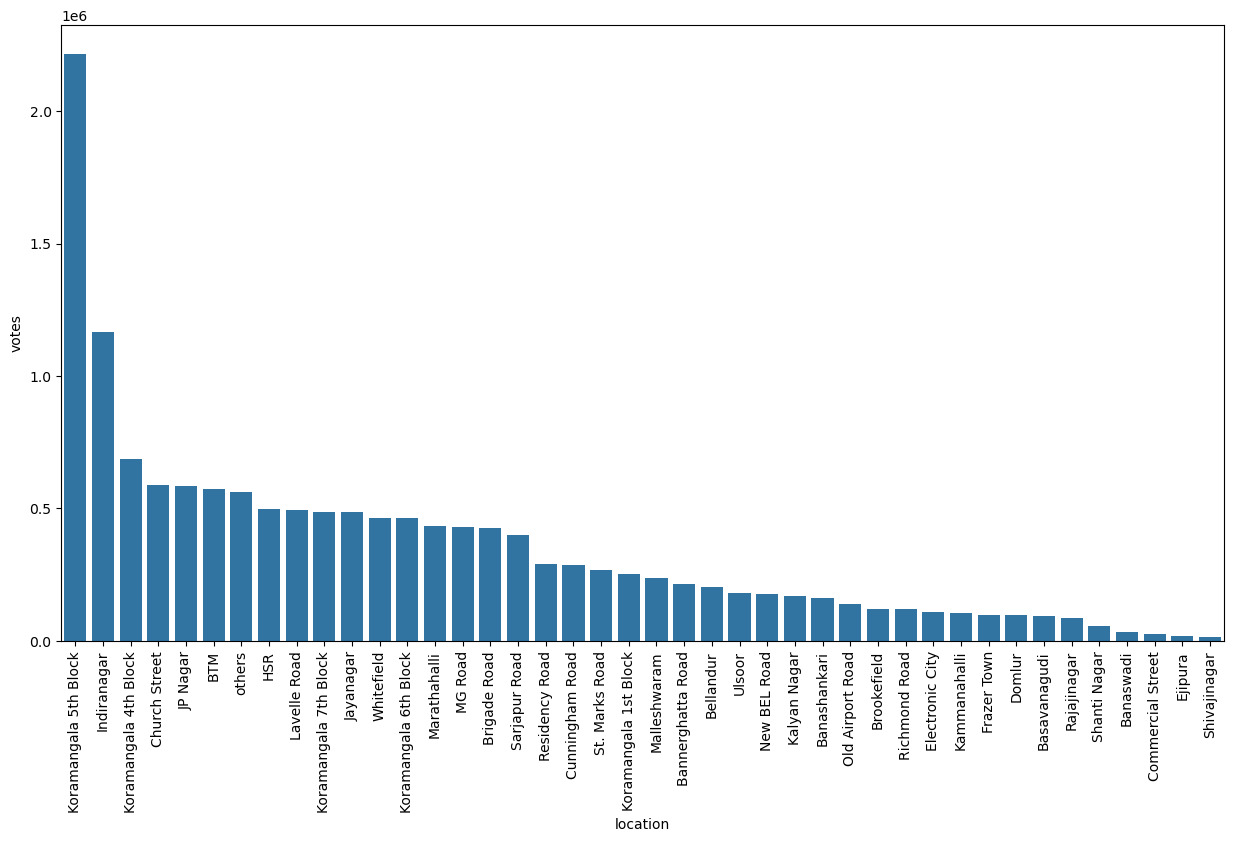

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)


In [42]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


In [43]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


# top cuisines in every region

In [44]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


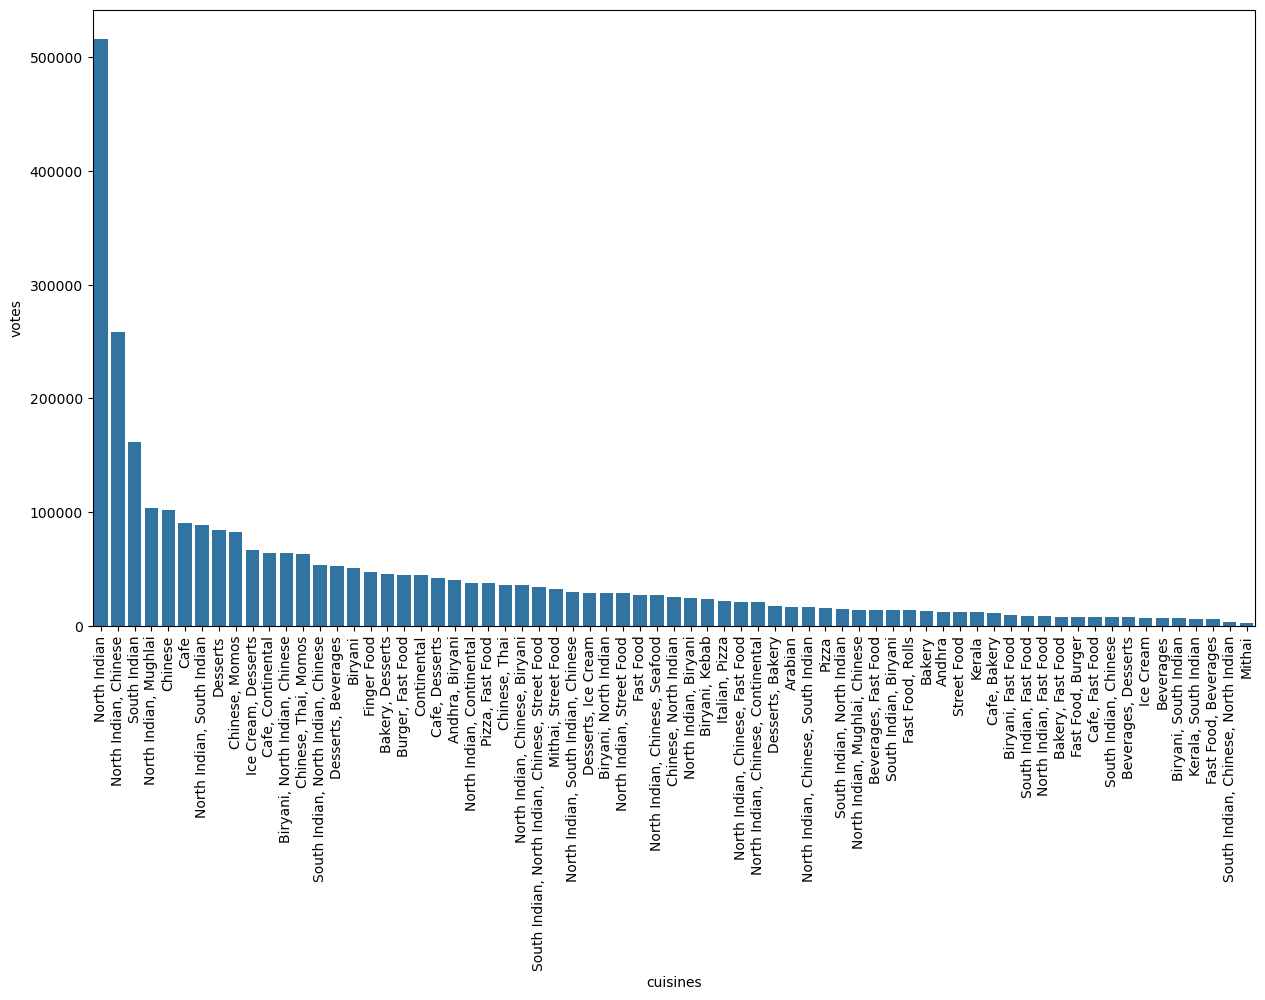

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)
plt.show()


# Analysing the Data with Buisness Questions

In [46]:
# Q1) Which locations have the most restaurants?

# Q2) What are the most common types of restaurants?

# Q3) What is the rate of online ordering availible?

# Q4) What are the most common types of restaurant services?

# Q5) What is the availabilty of online and offline orders in different locations?

# Q6: What is the availabilty of Booking tables in different locations?

# Q7: Which type of restaurants has highest rate?

# Q8: What is distribuation of place types in different locations?

# Q9 Is there any correlation between these online order, table booking and restaurant ratings?

# Q1) Which locations have the most restaurants?

In [47]:
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [48]:
locations = df['location'].value_counts().head(10).reset_index()
locations

,location,count
0,BTM,5056
1,others,4954
2,HSR,2494
3,Koramangala 5th Block,2479
4,JP Nagar,2218
5,Whitefield,2105
6,Indiranagar,2026
7,Jayanagar,1916
8,Marathahalli,1805
9,Bannerghatta Road,1609


Text(0, 0.5, 'Locations')

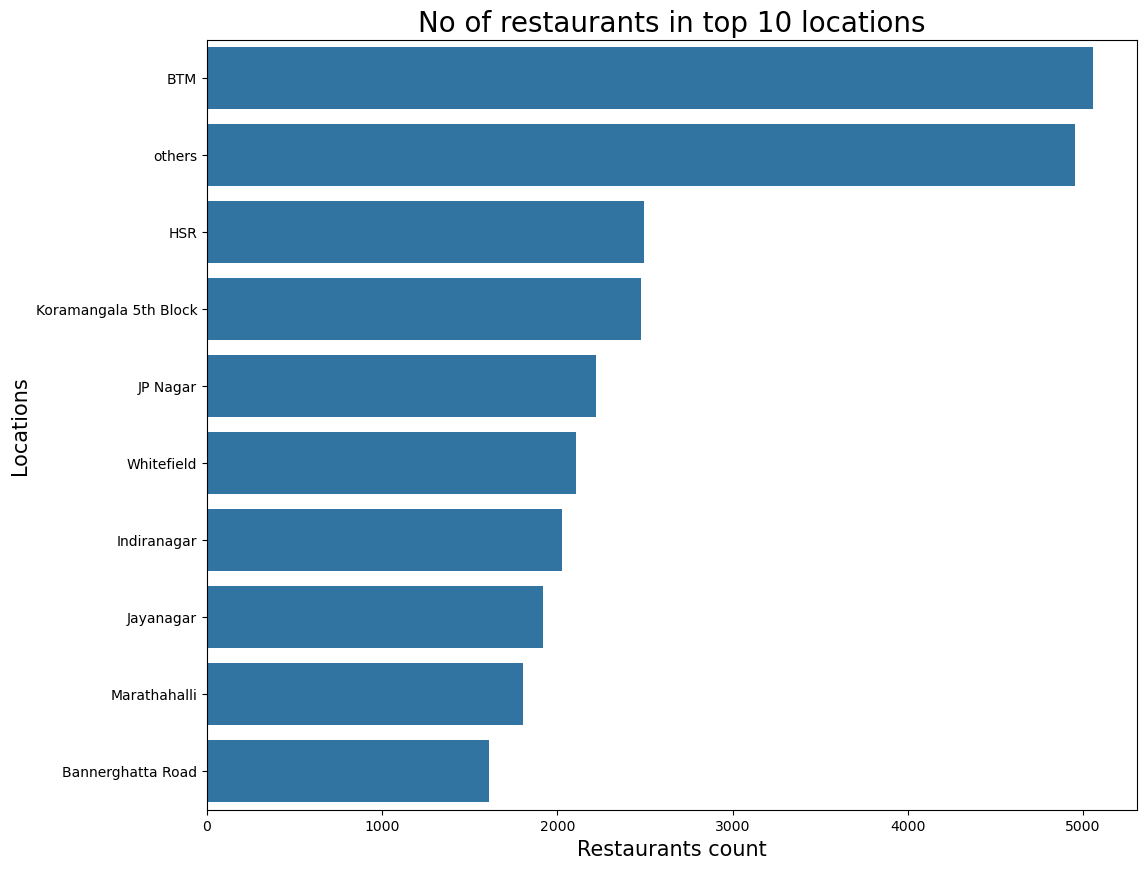

In [49]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'count',y= 'location',data=locations)
plt.title("No of restaurants in top 10 locations",fontsize = 20)
plt.xlabel("Restaurants count",fontsize=15)
plt.ylabel("Locations",fontsize = 15)

# Q2) What are the most common types of restaurants?

In [50]:
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [51]:
rest_type_count = df['rest_type'].value_counts().head(10).reset_index()
rest_type_count

,rest_type,count
0,Quick Bites,19010
1,Casual Dining,10253
2,others,9003
3,Cafe,3682
4,Delivery,2574
5,Dessert Parlor,2242
6,"Takeaway, Delivery",2008
7,Bakery,1140
8,"Casual Dining, Bar",1130


Text(0, 0.5, 'Restaurant type')

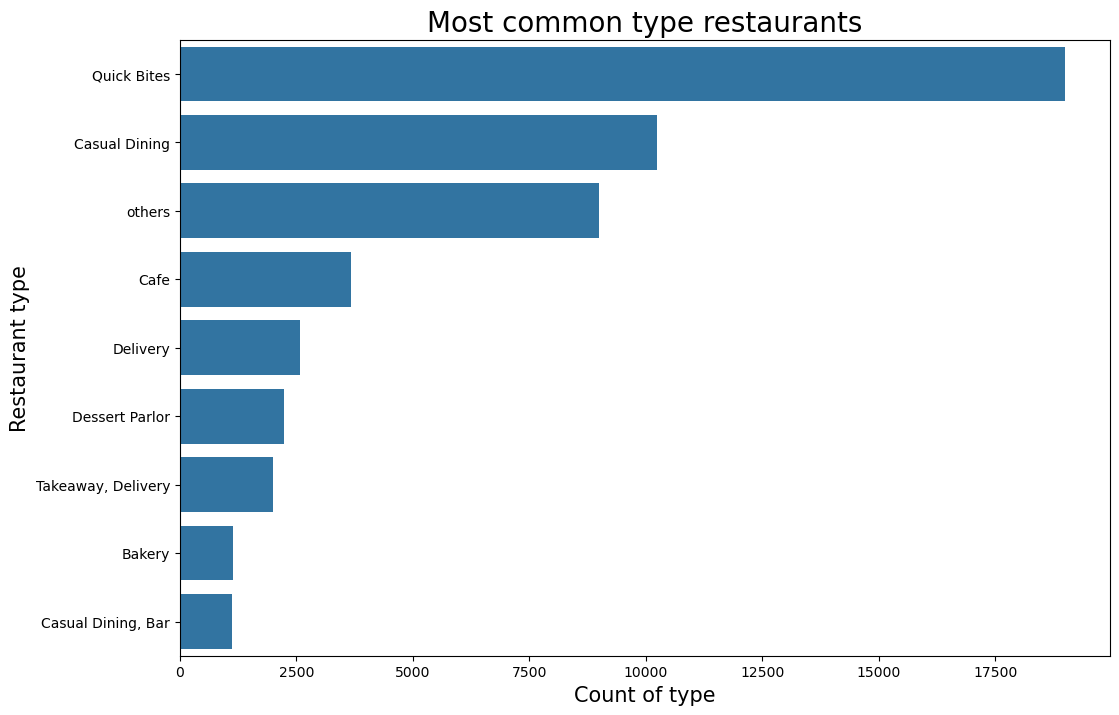

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x='count',y = 'rest_type' , data = rest_type_count)
plt.title("Most common type restaurants",fontsize = 20)
plt.xlabel("Count of type",fontsize=15)
plt.ylabel("Restaurant type",fontsize = 15)

# Q3) What is the rate of online ordering availible?

([<matplotlib.patches.Wedge at 0x16018355160>,
 [Text(-1.0927116553129623, -0.12641692269314925, 'Yes'),
  Text(1.0927116553129623, 0.1264169226931496, 'No')])

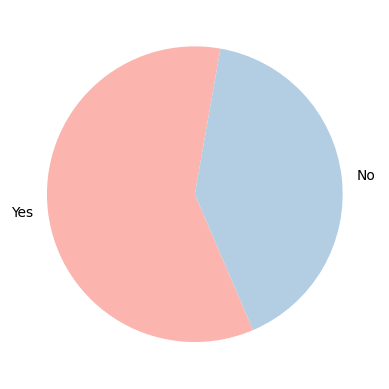

In [53]:
online_order_availability = df['online_order'].value_counts()
plt.pie(online_order_availability,labels = online_order_availability.index,colors = sns.color_palette('Pastel1'),startangle = 80)

In [54]:
df['online_order'].value_counts()

online_order
Yes    30228
No     20814
Name: count, dtype: int64

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\1182376999.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'online_order',data = df, palette='Dark2')


<Axes: xlabel='online_order', ylabel='count'>

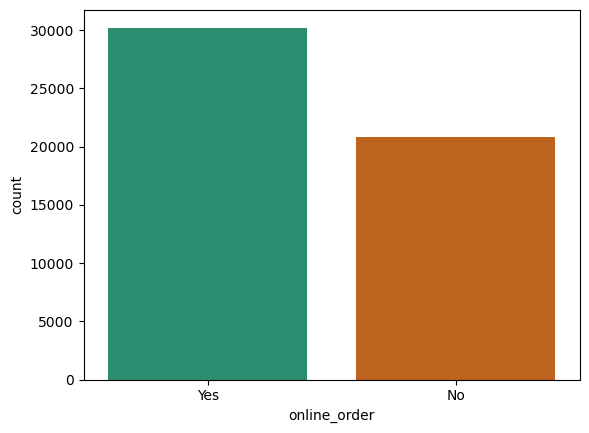

In [55]:
sns.countplot(x = 'online_order',data = df, palette='Dark2')


# Q4) What are the most common types of restaurant services?

In [56]:
common_type = df['type'].value_counts().head(5)
common_type

type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1601aea25d0>,
 [Text(-1.1478041018758987, 0.3500653420675373, 'Delivery'),
  Text(0.8421123709443794, -0.7077052738975712, 'Dine-out'),
  Text(0.8810303721547241, 0.6586239316490924, 'Desserts'),
  Text(0.6163860568385656, 0.911080802637727, 'Cafes'),
  Text(0.4464080053542973, 1.0053456583462217, 'Drinks & nightlife')])

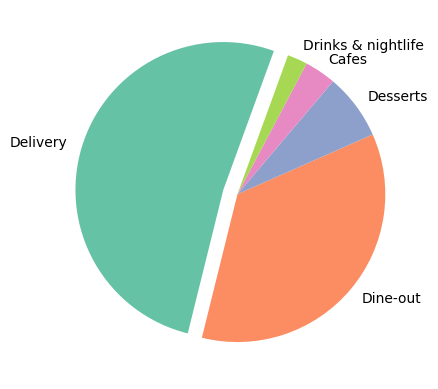

In [57]:

explode = [0.1 if val == common_type.max() else 0 for val in common_type]

plt.pie(
    common_type,
    labels=common_type.index,
    startangle=70,
    colors=sns.color_palette('Set2'),
    explode=explode
)


# Q5) What is the availabilty of online and offline orders in different locations?

In [58]:
online_order_locations = pd.crosstab(df['location'],df['online_order'])
online_order_locations

online_order,No,Yes
location,,
BTM,1763,3293
Banashankari,397,505
Banaswadi,302,338
Bannerghatta Road,685,924
Basavanagudi,243,441
Bellandur,517,751
Brigade Road,552,658
Brookefield,239,417
Church Street,226,340


<Axes: title={'center': 'Online order availability'}, xlabel='location'>

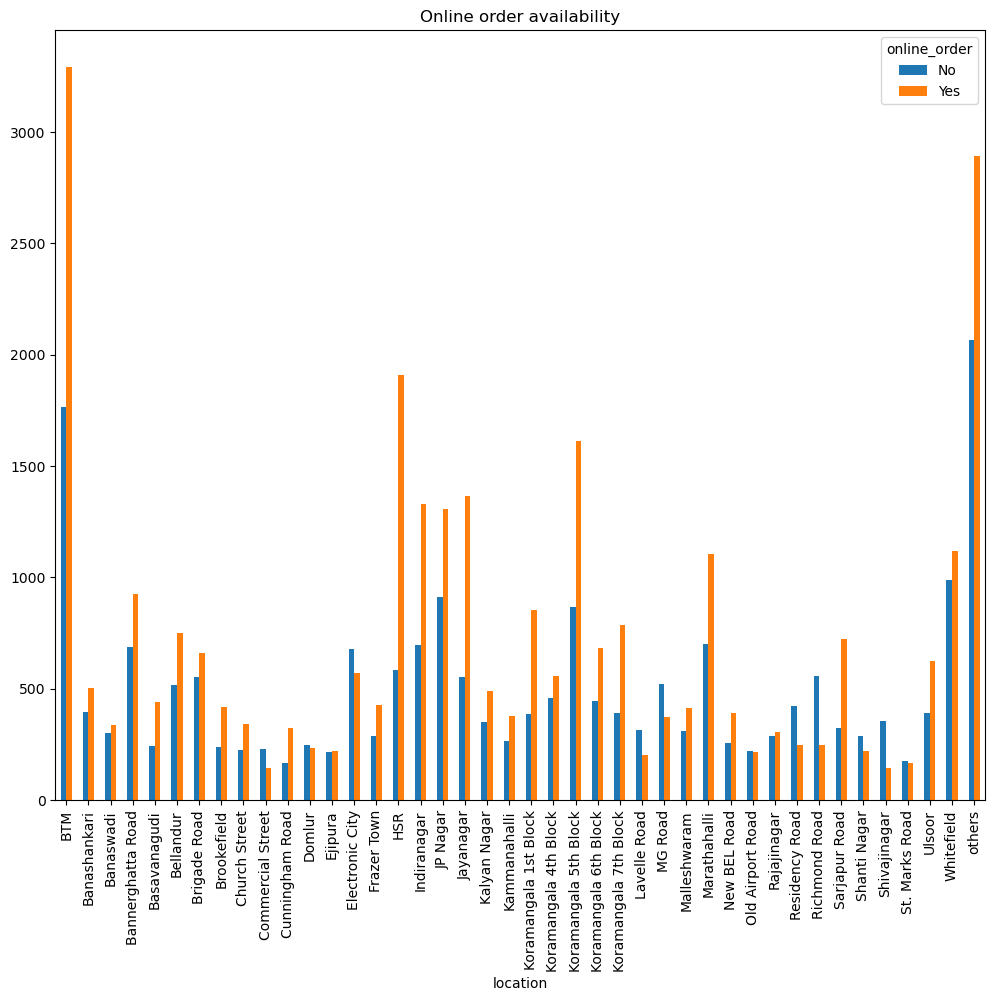

In [59]:
online_order_locations.plot(kind = 'bar',figsize = (12,10),title = 'Online order availability',)

# Q6: What is the availabilty of Booking tables in different locations?

In [60]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet


<Axes: title={'center': 'Book table availability in different locations'}, xlabel='location'>

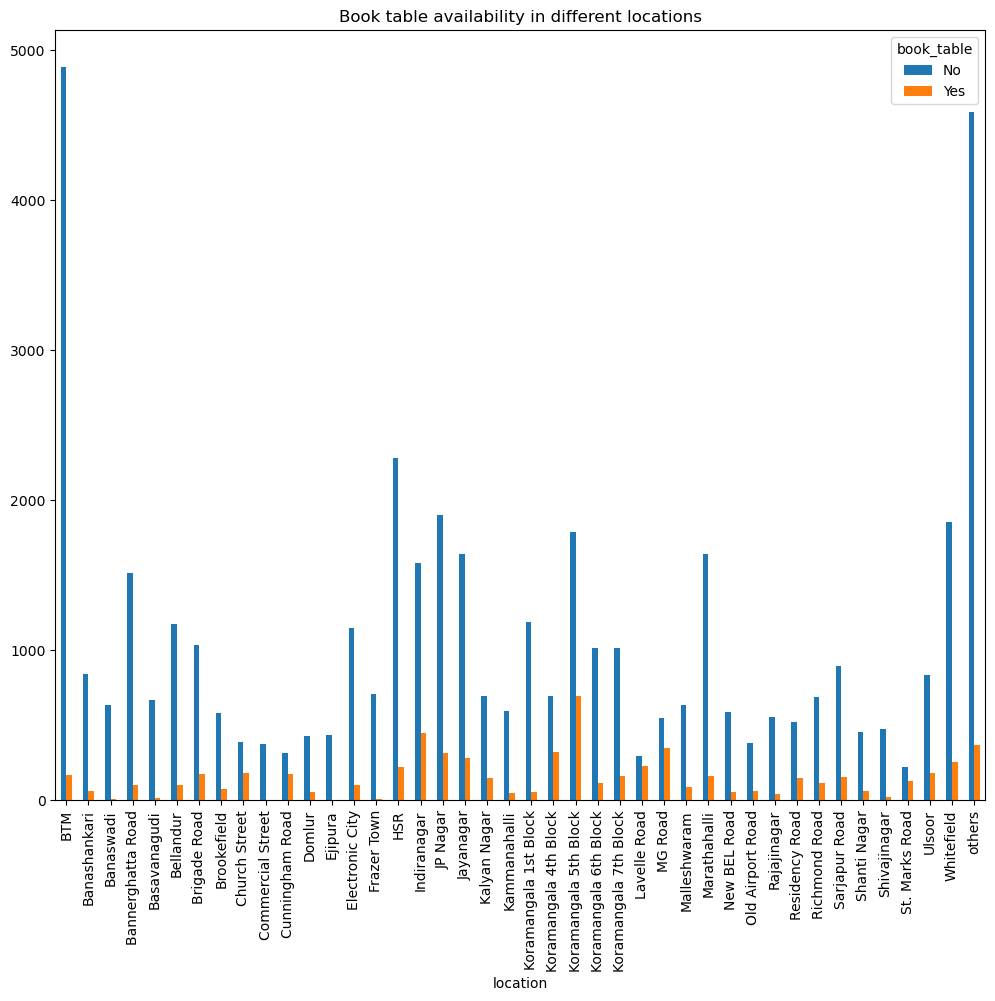

In [61]:
table_book_avail = pd.crosstab(df['location'],df['book_table'])
table_book_avail.plot(kind = 'bar',figsize = (12,10),title = 'Book table availability in different locations')

# Q7: Which type of restaurants has highest rate?

C:\Users\rojy2\AppData\Local\Temp\ipykernel_33396\269852883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'type', y = 'rate',data = df,palette = 'inferno')


Text(0, 0.5, 'Rating out of 5')

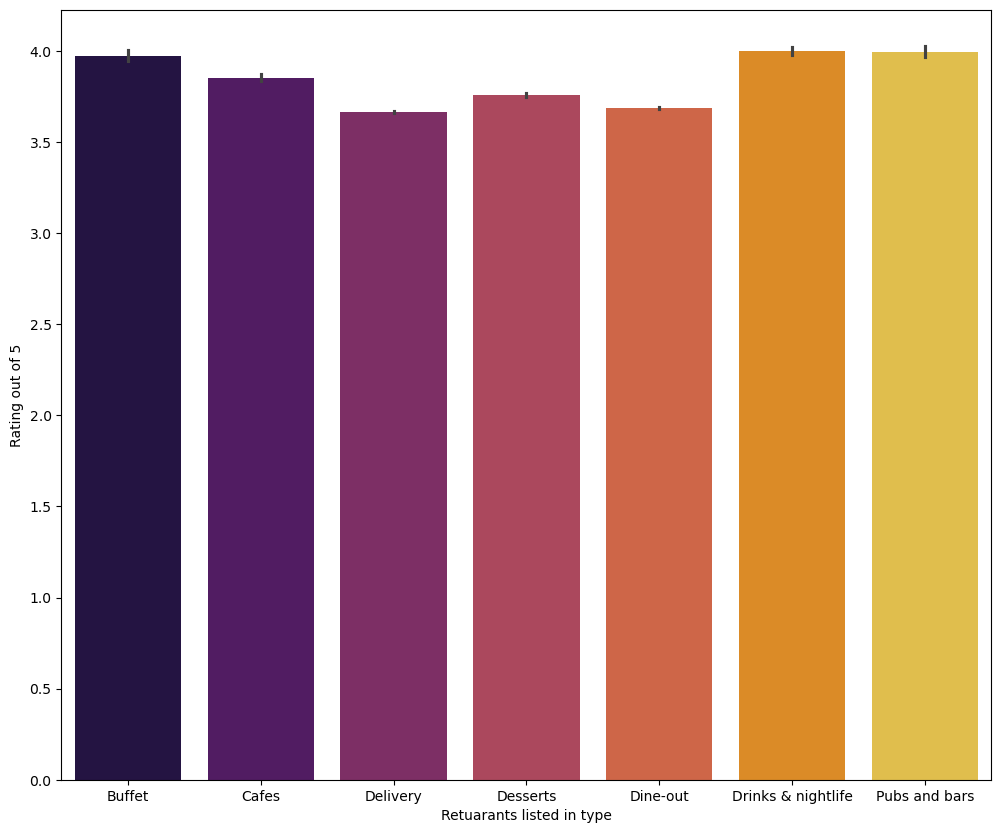

In [62]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'type', y = 'rate',data = df,palette = 'inferno')
plt.xlabel("Retuarants listed in type")
plt.ylabel("Rating out of 5")

# Q8: What is distribuation of place types in different locations?

In [63]:
df2 = df['location'].value_counts().head(10)
df2

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'L

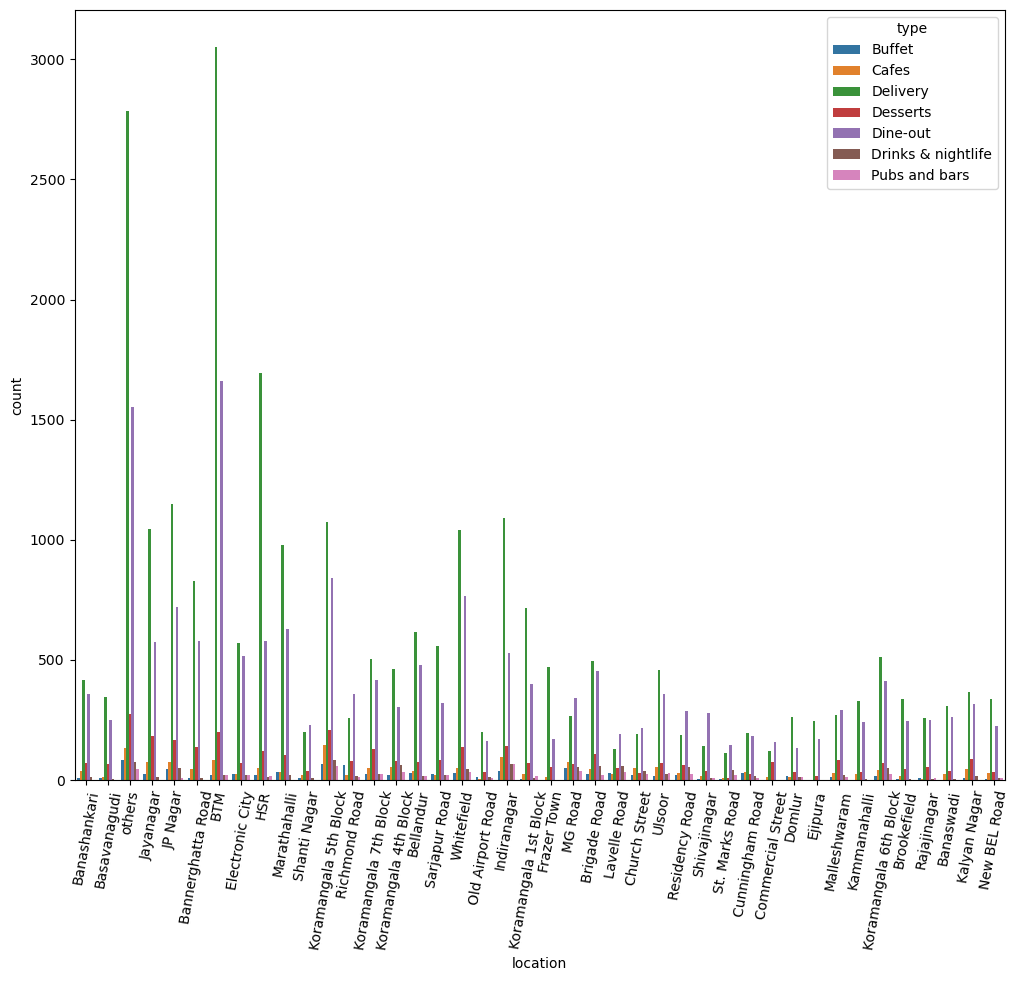

In [64]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'location',data =df,hue = 'type')
plt.xlabel("location")
plt.xticks(rotation = 80)

In [65]:
location_type_count = df.groupby(['location','type']).size().reset_index(name = 'count')
top_10 = df['location'].value_counts().head(10).index
location_type_count  = location_type_count[location_type_count['location'].isin(top_10)]
location_type_count

pivot_df = location_type_count.pivot(index = 'location',columns = 'type',values = 'count').fillna(0)
pivot_df

type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,21.0,83.0,3053.0,198.0,1660.0,22.0,19.0
Bannerghatta Road,9.0,46.0,828.0,137.0,578.0,9.0,2.0
HSR,19.0,49.0,1694.0,120.0,580.0,14.0,18.0
Indiranagar,38.0,97.0,1091.0,140.0,529.0,65.0,66.0
JP Nagar,45.0,76.0,1151.0,166.0,722.0,51.0,7.0
Jayanagar,27.0,77.0,1043.0,182.0,575.0,12.0,0.0
Koramangala 5th Block,65.0,146.0,1075.0,209.0,842.0,84.0,58.0
Marathahalli,34.0,32.0,980.0,105.0,630.0,22.0,2.0
Whitefield,28.0,51.0,1041.0,137.0,768.0,47.0,33.0


<Axes: xlabel='location'>

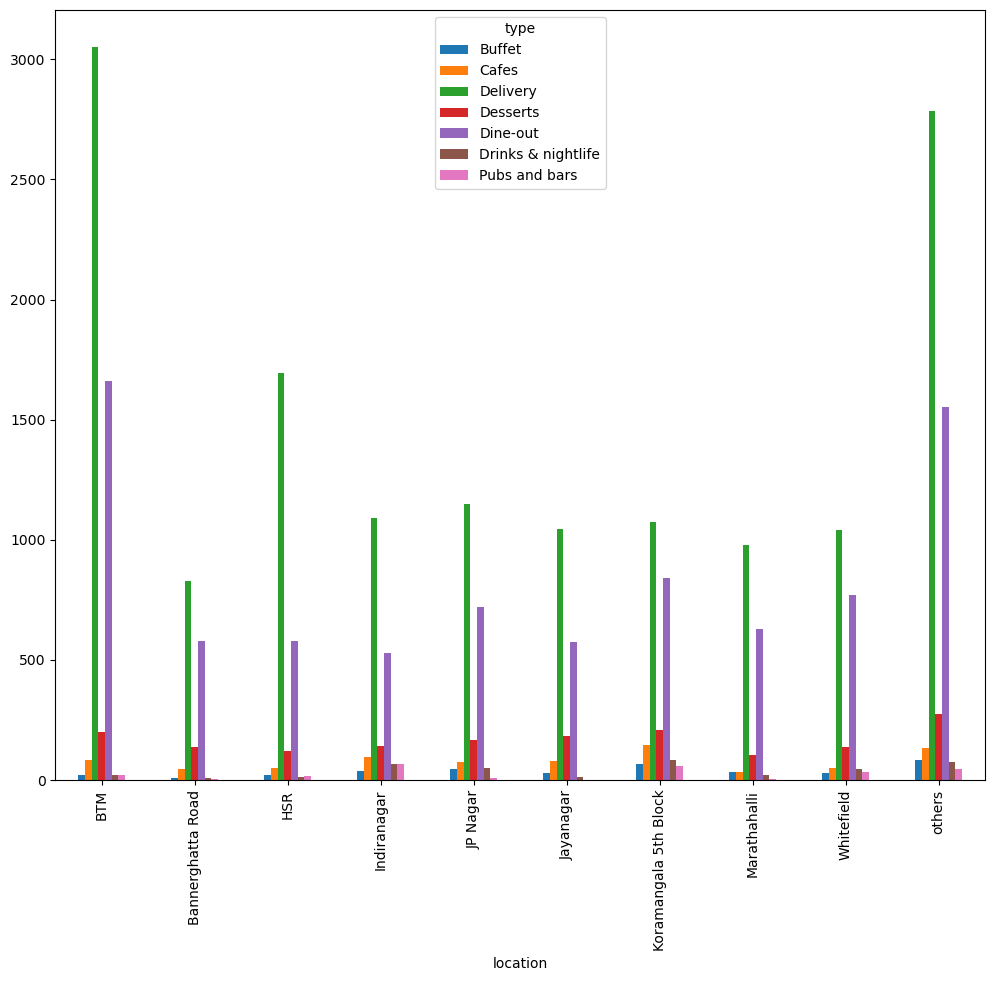

In [66]:
pivot_df.plot(kind = 'bar',figsize = (12,10))

# Q9 Is there any correlation between these online order, table booking and restaurant ratings?

In [67]:
df1 = df.dropna(subset = ['rate'] )
df1.groupby(['online_order','book_table'])['rate'].describe()

count      mean       std  min  25%       50%  \
online_order book_table                                                    
No           No          18181.0  3.604215  0.345562  1.8  3.4  3.700142   
             Yes          2633.0  4.144403  0.312036  2.5  3.9  4.200000   
Yes          No          26445.0  3.663424  0.378730  2.1  3.5  3.700142   
             Yes          3783.0  4.125934  0.301152  2.2  4.0  4.100000   

                              75%  max  
online_order book_table                 
No           No          3.700142  4.9  
             Yes         4.400000  4.9  
Yes          No          3.900000  4.9  
             Yes         4.300000  4.9

In [68]:
def cat_rate(rate):
    if rate<3.6:
        return"bad"
    elif rate<4:
        return"good"
    else:
        return"insane"

In [69]:
df['rate']=df['rate'].apply(cat_rate)

In [70]:
df.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,insane,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,insane,787,Banashankari,Casual Dining,others,800,Buffet
2,San Churro Cafe,Yes,No,good,918,Banashankari,others,others,800,Buffet
3,Addhuri Udupi Bhojana,No,No,good,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,good,166,Basavanagudi,Casual Dining,others,600,Buffet


In [71]:
df['rate'].value_counts()

rate
good      24704
bad       14070
insane    12268
Name: count, dtype: int64

# Machine Learning

In [72]:
import xgboost as xgb
import seaborn as sns
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB  # For numeric data
from sklearn.naive_bayes import MultinomialNB  # For count-based features (like text)
from sklearn.naive_bayes import BernoulliNB  # For binary features



In [73]:
X = df.drop(columns=['rate','name'])   
y = df['rate']      

In [74]:
print(y)

0        insane
1        insane
2          good
3          good
4          good
          ...  
51712      good
51713      good
51714      good
51715    insane
51716       bad
Name: rate, Length: 51042, dtype: object


In [75]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [76]:
print(y)

[2 2 1 ... 1 2 0]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [78]:
cat_feat = [feat for feat in X_train.columns if X[feat].dtypes == 'O']
num_feat = [feat for feat in X_train.columns if X[feat].dtypes != 'O']
bin_feat = [feat for feat in cat_feat if X_train[feat].nunique() == 2]
cat_feat = [feat for feat in cat_feat if X_train[feat].nunique() > 2]

In [79]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

In [80]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ord_enc = OrdinalEncoder()
scaler = StandardScaler()

In [81]:
ohe_transformed = ohe.fit_transform(X_train[cat_feat])
ohe_df = pd.DataFrame(ohe_transformed, columns=ohe.get_feature_names_out(cat_feat))

In [82]:
ord_transformed = ord_enc.fit_transform(X_train[bin_feat])
ord_df = pd.DataFrame(ord_transformed, columns=bin_feat)

In [83]:
scaled_transformed = scaler.fit_transform(X_train[num_feat])
scaled_df = pd.DataFrame(scaled_transformed, columns=num_feat)

In [84]:
x_train_transformed = pd.concat([ohe_df, ord_df, scaled_df], axis=1)

In [85]:
ohe_test = ohe.transform(X_test[cat_feat])
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cat_feat), index=X_test.index)

ord_test = ord_enc.transform(X_test[bin_feat])
ord_test_df = pd.DataFrame(ord_test, columns=bin_feat, index=X_test.index)

num_test = scaler.transform(X_test[num_feat])
num_test_df = pd.DataFrame(num_test, columns=num_feat, index=X_test.index)

X_test_transformed= pd.concat([ohe_test_df, ord_test_df, num_test_df], axis=1)


In [86]:
models = {

                "KNN" : KNeighborsClassifier(5),
                "Random Forest": RandomForestClassifier(random_state=42),
                "Decision Tree": DecisionTreeClassifier(random_state=42),
                "SVM":SVC(kernel='linear', C=0.5),
                "Logistic Regression": LogisticRegression(max_iter=2000, C=0.5, multi_class='multinomial', solver='lbfgs'),
                "XGBoost":XGBClassifier(random_state=42)
                
            }

In [87]:
def evaluate_model(x_train,y_train, x_test , y_test, models:dict):
        report = {}
        for i in range(len(list(models))):
            model = list(models.values())[i]
            model.fit(x_train,y_train)

            y_test_pred = model.predict(x_test)

            

            test_precision_score=precision_score(y_test, y_test_pred, average='weighted')
            test_F1_score=f1_score(y_test, y_test_pred, average='weighted')
            test_Recall_score=recall_score(y_test, y_test_pred, average='weighted')
            test_accuracy_score=accuracy_score(y_test, y_test_pred)



            report[list(models.keys())[i]] = {
                "F1": test_F1_score,
                "precision": test_precision_score,
                "recall": test_Recall_score,
                "accuracy" :  test_accuracy_score
            }



        return report 

In [88]:
model_report:dict = evaluate_model (x_train_transformed,y_train,X_test_transformed,y_test,models)

best_model_name = max(model_report, key=lambda x: model_report[x]['accuracy'])
best_model_score = model_report[best_model_name]['accuracy']
best_model = models[best_model_name]

c:\Users\rojy2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [89]:
for a,b in model_report.items():
    print(a,b)

KNN {'F1': 0.7897072575614277, 'precision': 0.7916450006547764, 'recall': 0.7889117445391322, 'accuracy': 0.7889117445391322}
Random Forest {'F1': 0.9393891651518944, 'precision': 0.93946907428761, 'recall': 0.9393672249975512, 'accuracy': 0.9393672249975512}
Decision Tree {'F1': 0.9536732849515455, 'precision': 0.9536808668347416, 'recall': 0.9536683318640415, 'accuracy': 0.9536683318640415}
SVM {'F1': 0.564023409398899, 'precision': 0.6172967271437979, 'recall': 0.6134783034577334, 'accuracy': 0.6134783034577334}
Logistic Regression {'F1': 0.5774815820175745, 'precision': 0.6219692610199261, 'recall': 0.6174943677147615, 'accuracy': 0.6174943677147615}
XGBoost {'F1': 0.8418922470849564, 'precision': 0.8461158413347779, 'recall': 0.842785777255363, 'accuracy': 0.842785777255363}


In [90]:
print(best_model_name)

Decision Tree


# Deep Learning

In [91]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [92]:
## save y labels before one-hot encoding
num_classes = len(np.unique(y_train))  


In [93]:
model = Sequential()
model.add(Input(shape=(x_train_transformed.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [94]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train_transformed, y_train,
    epochs=50,
    validation_data=(X_test_transformed, y_test),
    callbacks=[early_stop]
)


Epoch 1/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5820 - loss: 0.8446 - val_accuracy: 0.6382 - val_loss: 0.7344
Epoch 2/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6304 - loss: 0.7351 - val_accuracy: 0.6520 - val_loss: 0.6998
Epoch 3/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6572 - loss: 0.6987 - val_accuracy: 0.6665 - val_loss: 0.6693
Epoch 4/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6747 - loss: 0.6675 - val_accuracy: 0.6838 - val_loss: 0.6474
Epoch 5/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6817 - loss: 0.6546 - val_accuracy: 0.7015 - val_loss: 0.6259
Epoch 6/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6908 - loss: 0.6340 - val_accuracy: 0.7096 - val_loss: 0.6135
Epoch 7/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7009 - loss: 0.6181 - val_accuracy: 0.7172 - val_loss: 0.5929
Epoch 8/50
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7029 - loss: 0.6093 - 

In [96]:

train_loss, train_accuracy = model.evaluate(x_train_transformed, y_train)
test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test)


1277/1277 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.8432 - loss: 0.3578
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8078 - loss: 0.4334  


In [97]:
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Train Loss: 0.3569, Train Accuracy: 0.8433
Test Loss: 0.4447, Test Accuracy: 0.8055


In [98]:
import joblib

In [99]:
# Save ML model
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']

In [100]:
joblib.dump(ohe,"encoder.pkl") 
joblib.dump(ord_enc,"ord_enc.pkl") 
joblib.dump(scaler,"scaler.pkl") 

['scaler.pkl']

In [101]:
model.save('my_model.keras')

In [102]:
print(type(best_model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [103]:
print(type(model))

<class 'keras.src.models.sequential.Sequential'>


In [104]:
print(type(ohe))

<class 'sklearn.preprocessing._encoders.OneHotEncoder'>


In [105]:
df.to_csv("raw.csv",index=False,header=True)

In [106]:
cat_feat

['location', 'rest_type', 'cuisines', 'type']

In [107]:
bin_feat

['online_order', 'book_table']

In [108]:
num_feat

['votes', 'cost2plates']